In [1]:
from matplotlib import pyplot as plt
# MTCNN detects faces and defines an anchor box
from mtcnn.mtcnn import MTCNN

In [6]:
img_path = '../../Data/FaceVerification/neg_1.jpg'

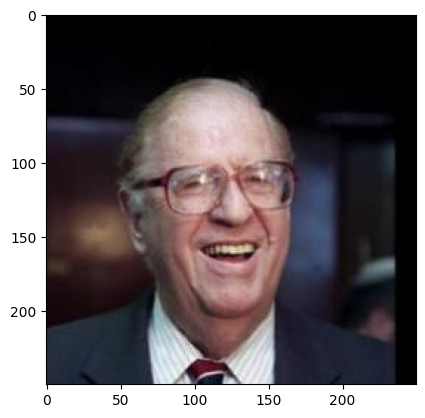

In [7]:
img = plt.imread(img_path)
plt.imshow(img)

In [3]:
detector = MTCNN()

faces = detector.detect_faces(img)
for face in faces:
  print(face)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
{'box': [68, 61, 95, 129], 'confidence': 0.9999865293502808, 'keypoints': {'left_eye': (100, 113), 'right_eye': (143, 111), 'nose': (128, 137), 'mouth_left': (103, 158), 'mouth_right': (144, 156)}}


In [4]:
from matplotlib.patches import Rectangle

In [5]:
def highlight_faces(image_path, faces):
  # display image
  image = plt.imread(image_path)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

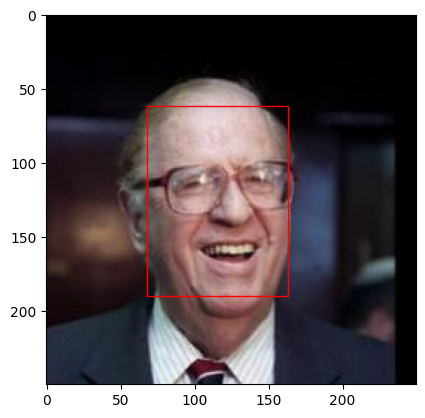

In [8]:
highlight_faces(img_path, faces)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


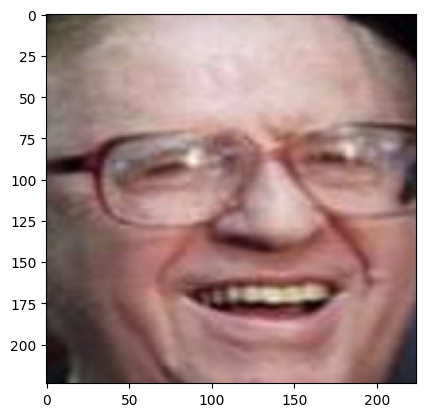

In [10]:
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)

  face_images = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  return face_images

extracted_face = extract_face_from_image(img_path)

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()